In [12]:
#Python 3.11.2
#Import packages
import scipy.integrate as scipy
import scipy.optimize as optimize
import scipy.stats as stats
import pandas as pd
import numpy as np
import pylab as pl
import random
import matplotlib.pyplot as plt
from collections import defaultdict
import json # for pretty printing
import geopandas as gpd

import shutil
import sys
import os.path


In [16]:
import logging

console_handler = logging.StreamHandler()
formatter = logging.Formatter("%(levelname)s:%(message)s")
console_handler.setFormatter(formatter)
logger = logging.getLogger("pyproj")
logger.addHandler(console_handler)
logger.setLevel(logging.DEBUG)

logging.basicConfig(filename ='example.log', format="%(levelname)s:%(message)s", level=logging.DEBUG)

Reading shapefile

In [18]:
logging.info("Start of the program")
logging.debug("Start of the program")

In [3]:
parishScania = gpd.read_file('/Users/polislizarralde/PythonPlayground/docs/PlagueProject/MapScaniaSweden/ParishesScania.shp')
parishScania.head()

,G_NAME,GET_END_YE,GET_START_,G_UNIT_TYP,G_UNIT,G_SEQ,geometry
0,HOVS FÖRSAMLING L LÄN,9999,NaN,SWE_KYRK,10744015.0,51568.0,"POLYGON ((4159374.27967 3280178.36063, 4158183..."
1,TOREKOVS FÖRSAMLING,9999,NaN,SWE_KYRK,10744027.0,94148.0,"POLYGON ((4158250.03557 3280475.52635, 4158374..."
2,ÖSTRA KARUPS FÖRSAMLING,9999,NaN,SWE_KYRK,10744039.0,96471.0,"POLYGON ((4175084.90371 3273619.02854, 4174985..."
3,KRISTIANSTADS HELIGA TREFALDIGHETS FÖRSAMLING,9999,NaN,SWE_KYRK,10744052.0,98647.0,"POLYGON ((4249757.03368 3241445.33808, 4249645..."
4,NORRA ÅSUMS FÖRSAMLING,9999,NaN,SWE_KYRK,10744064.0,96757.0,"POLYGON ((4249757.03368 3241445.33808, 4249865..."


In [14]:
type(parishScania)

geopandas.geodataframe.GeoDataFrame

In [17]:
import geopandas as gpd



# Access the first column
first_column = parishScania.iloc[:, 0]

# Access the last column
last_column = parishScania.iloc[1, -1]
print(last_column)

POLYGON ((4158250.0355738313 3280475.526350782, 4158374.466639277 3280145.0586106633, 4158452.9321924117 3279781.623501739, 4158313.456007825 3279702.054255758, 4158115.0223563765 3279510.5842455197, 4158231.5235192245 3279276.8045503264, 4158036.7586839325 3278209.653374821, 4157348.432187156 3277939.086489549, 4157146.124022989 3279693.930144167, 4157749.9631899674 3280638.922682606, 4157852.1978058186 3280579.172094201, 4158250.0355738313 3280475.526350782))


Plotting

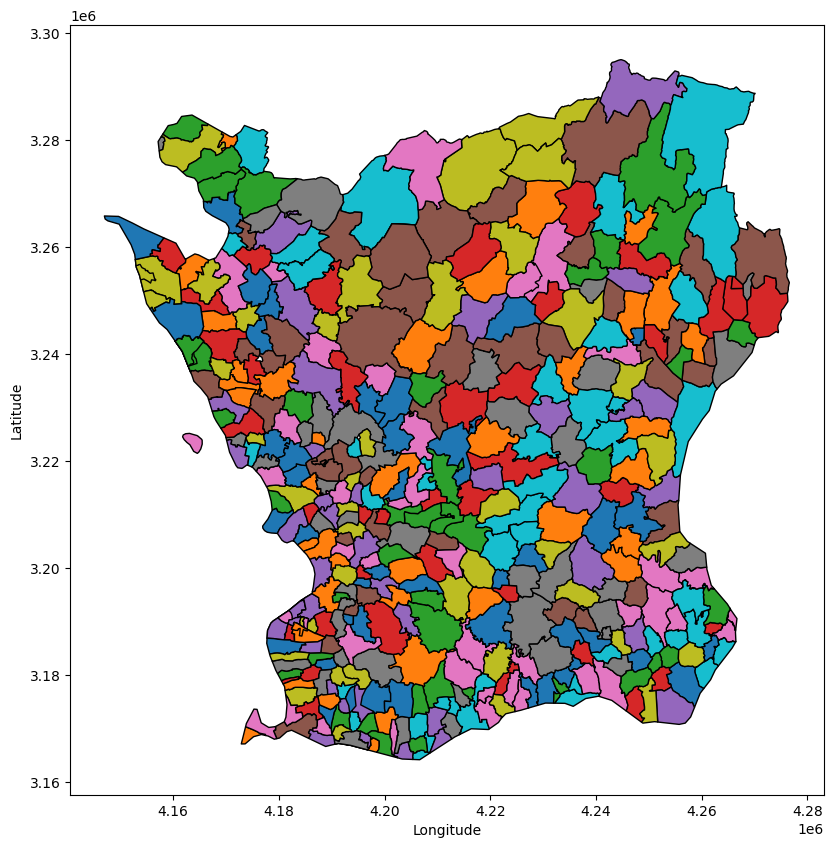

In [63]:
fig,ax = plt.subplots(figsize=(13,10))
parishScania.plot(ax=ax, column = "G_NAME", edgecolor='black', legend=False)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# legend = ax.get_legend()
# legend.set_bbox_to_anchor((1, 0.2))
plt.show()

Before computing the area for each polygon we have to change the projection.

In [64]:
parishScania.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
parishScania = parishScania.to_crs({'init': 'epsg:32633'})

/usr/local/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
DEBUG:PROJ_ERROR: utm: Invalid latitude
DEBUG:PROJ_ERROR: utm: Invalid latitude
DEBUG:PROJ_ERROR: utm: Invalid latitude
DEBUG:PROJ_ERROR: utm: Invalid latitude
DEBUG:PROJ_ERROR: utm: Invalid latitude
DEBUG:PROJ_ERROR: utm: Invalid latitude
DEBUG:PROJ_ERROR: utm: Invalid latitude
DEBUG:PROJ_ERROR: utm: Invalid latitude
DEBUG:PROJ_ERROR: utm: Invalid latitude
DEBUG:PROJ_ERROR: utm: Invalid latitude
DEBUG:PROJ_ERROR: utm: Invalid latitude
DEBUG:PROJ_ERROR: utm: Invalid latitude
DEBUG:PROJ_ERROR: utm: Invalid latitude
DEBUG:PROJ_ERROR: utm: Invalid latitude
DEBUG:PROJ_ERROR: utm: Invalid latitude
DEBUG:PROJ_ER

KeyboardInterrupt: 

Exception ignored in: 'pyproj._datadir.pyproj_log_function'
Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.11/3.11.2_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/logging/__init__.py", line 1477, in debug
    self._log(DEBUG, msg, args, **kwargs)
  File "/usr/local/Cellar/python@3.11/3.11.2_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/logging/__init__.py", line 1634, in _log
    self.handle(record)
  File "/usr/local/Cellar/python@3.11/3.11.2_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/logging/__init__.py", line 1644, in handle
    self.callHandlers(record)
  File "/usr/local/Cellar/python@3.11/3.11.2_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/logging/__init__.py", line 1706, in callHandlers
    hdlr.handle(record)
  File "/usr/local/Cellar/python@3.11/3.11.2_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/logging/__init__.py", line 978, in handle
    self.emit(record)
  File "/usr/local/Cellar/

KeyboardInterrupt: 

Exception ignored in: 'pyproj._datadir.pyproj_log_function'
Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.11/3.11.2_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/logging/__init__.py", line 1477, in debug
    self._log(DEBUG, msg, args, **kwargs)
  File "/usr/local/Cellar/python@3.11/3.11.2_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/logging/__init__.py", line 1634, in _log
    self.handle(record)
  File "/usr/local/Cellar/python@3.11/3.11.2_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/logging/__init__.py", line 1644, in handle
    self.callHandlers(record)
  File "/usr/local/Cellar/python@3.11/3.11.2_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/logging/__init__.py", line 1706, in callHandlers
    hdlr.handle(record)
  File "/usr/local/Cellar/python@3.11/3.11.2_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/logging/__init__.py", line 978, in handle
    self.emit(record)
  File "/usr/local/Cellar/

In [13]:
parishScania.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Calculate the area

In [67]:
parishScania[100:150]

,G_NAME,GET_END_YE,GET_START_,G_UNIT_TYP,G_UNIT,G_SEQ,geometry
100,RÄNGS FÖRSAMLING,9999,NaN,SWE_KYRK,10745056.0,51436.0,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ..."
101,SÖDRA ÅKARPS FÖRSAMLING,9999,NaN,SWE_KYRK,10745068.0,97432.0,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ..."
102,ÖSTRA GREVIE FÖRSAMLING,9999,NaN,SWE_KYRK,10745070.0,95290.0,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ..."
103,ARRIE FÖRSAMLING,9999,NaN,SWE_KYRK,10745081.0,92313.0,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ..."
104,BJUVS FÖRSAMLING,9999,NaN,SWE_KYRK,10745100.0,93917.0,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ..."
105,NORRA VRAMS FÖRSAMLING,9999,NaN,SWE_KYRK,10745111.0,97755.0,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ..."
106,EKEBY FÖRSAMLING M LÄN,9999,NaN,SWE_KYRK,10745123.0,98850.0,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ..."
107,KÄVLINGE FÖRSAMLING,9999,NaN,SWE_KYRK,10745135.0,95572.0,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ..."
108,FILBORNA FÖRSAMLING,9999,1977.0,SWE_KYRK,10745147.0,93939.0,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ..."
109,HÖGANÄS FÖRSAMLING,9999,1852.0,SWE_KYRK,10745160.0,98033.0,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ..."


In [56]:
parishScania.sort_values(by='G_NAME', inplace=True)
parishScania.head()

,G_NAME,GET_END_YE,GET_START_,G_UNIT_TYP,G_UNIT,G_SEQ,geometry
417,ALLERUMS FÖRSAMLING,9999,NaN,SWE_KYRK,10783823.0,96945.0,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ..."
370,ALSTADS FÖRSAMLING,9999,1980.0,SWE_KYRK,10783185.0,93165.0,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ..."
378,ANDERSLÖVS FÖRSAMLING,9999,NaN,SWE_KYRK,10783264.0,97248.0,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ..."
305,ANDRARUMS FÖRSAMLING,9999,NaN,SWE_KYRK,10748355.0,51312.0,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ..."
272,ANNELÖVS FÖRSAMLING,9999,NaN,SWE_KYRK,10747247.0,93633.0,"POLYGON ((inf inf, inf inf, inf inf, inf inf, ..."
